# Import Library and Check Dataset

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

In [ ]:
# Load dataset
df = pd.read_csv('Clicked Ads Dataset.csv')
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [ ]:
df.shape

(1000, 11)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

- Dataset terdiri dari 1000 baris dan 11 fitur
-  Dataset memiliki 5 fitur numerikal dan 6 fitur kategorikal
- Terdapat missing value pada fitur Daily Time Spent on Site, Area Income, Daily Internet Usage, dan Male
- Tidak ada duplikat data
- Tipe data timestamp masih berupa object, nantinya akan dirubah menjadi datetime

# Exploratory Data Analysis (EDA)

## Statistical Analysis

In [ ]:
# numerikal fitur
num = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == float)].columns.tolist()
num

['Unnamed: 0',
 'Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage']

In [ ]:
# kategorikal fitur
cat = df.loc[:, (df.dtypes == 'object')].columns.tolist()
cat

['Male', 'Timestamp', 'Clicked on Ad', 'city', 'province', 'category']

In [ ]:
df[num].describe().round(0).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,500.0,289.0,0.0,250.0,500.0,749.0,999.0
Daily Time Spent on Site,987.0,65.0,16.0,33.0,51.0,68.0,78.0,91.0
Age,1000.0,36.0,9.0,19.0,29.0,35.0,42.0,61.0
Area Income,987.0,384864671.0,94079990.0,97975500.0,328632990.0,399068320.0,458355450.0,556393600.0
Daily Internet Usage,989.0,180.0,44.0,105.0,139.0,183.0,219.0,267.0


- Rata-rata user menghabiskan waktu di suatu situs adalah 1 jam (65 menit).
- Rata-rata umur user adalah 36 tahun.
- Rata-rata pendapatan user adalah Rp 384.864.671 / tahun.
- Rata-rata pemakaian internet harian user adalah 3 jam (180 menit).

In [ ]:
df[cat].describe().T

,count,unique,top,freq
Male,997,2,Perempuan,518
Timestamp,1000,997,5/26/2016 15:40,2
Clicked on Ad,1000,2,No,500
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
category,1000,10,Otomotif,112


- Kebanyakan user adalah perempuan.
- Clicked on Ad Yes dan No memiliki jumlah value yang seimbang.
- Surabaya adalah kota dengan user terbanyak.
- Otomotif adalah kategori yang paling sering di klik.

## Univariate Analysis

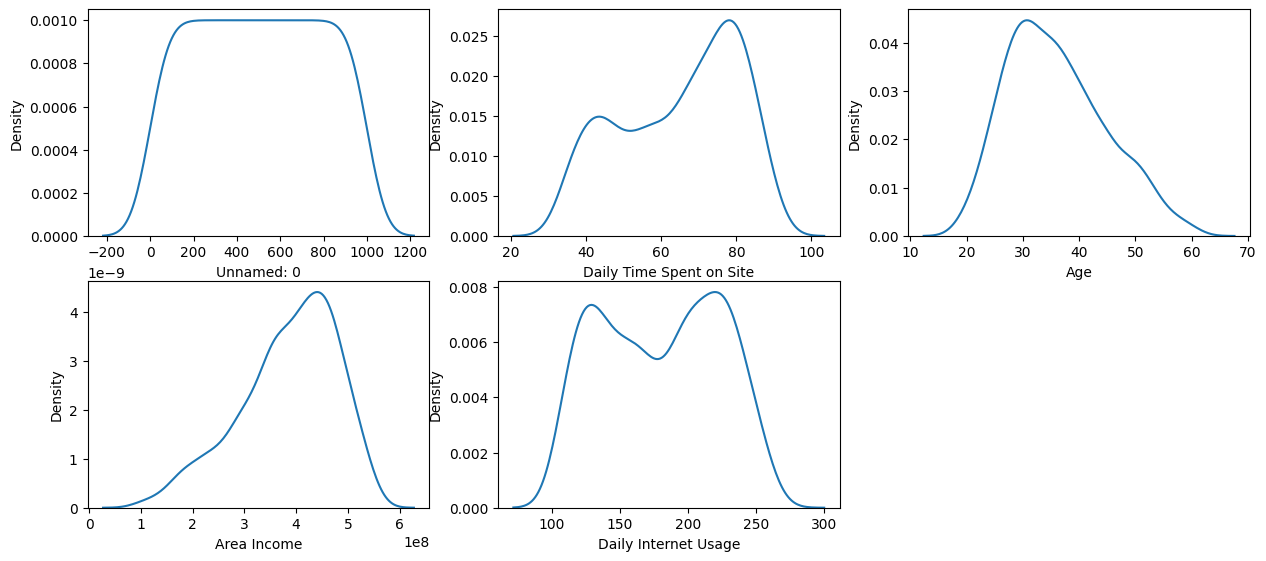

In [ ]:
# cek distribusi fitur numerikal
plt.figure(figsize = (15, 10))
for i in range(len(num)):
  plt.subplot(3, 3, i+1)
  sns.kdeplot(data = df, x = num[i])

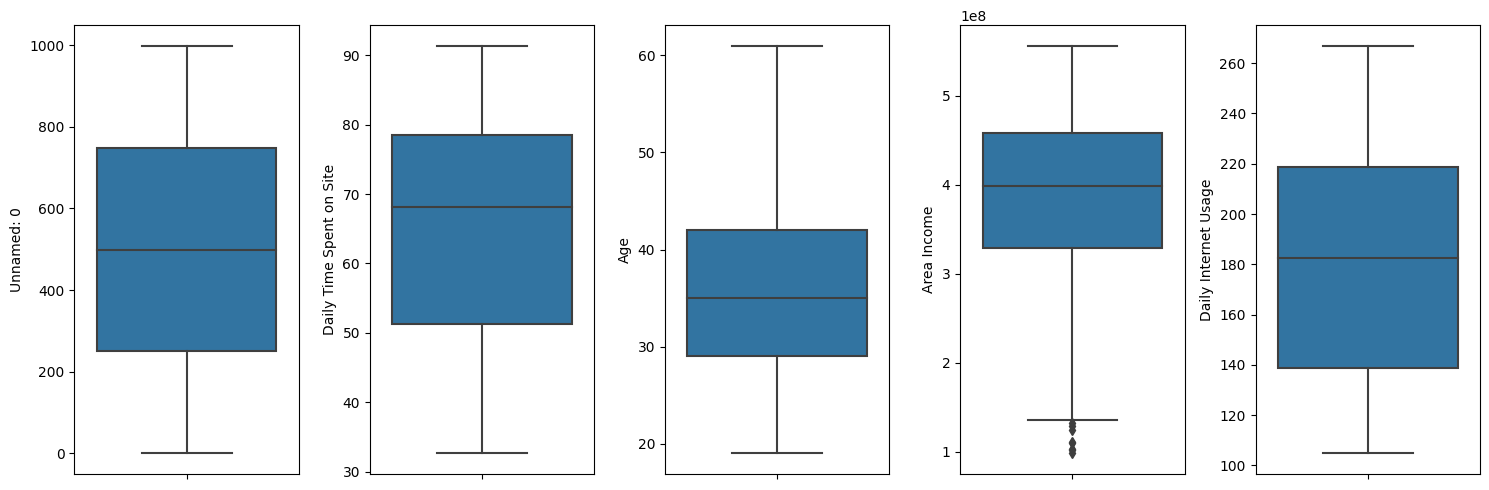

In [ ]:
# distribusi menggunakan boxplot
plt.figure(figsize=(15, 5))
for i in range(0, len(num)):
    plt.subplot(1, 5, i+1)
    sns.boxplot(df, y=df[num[i]], orient='v')
    plt.tight_layout()

In [ ]:
for col in cat:
    print(f'''Value count kolom {col}:''')
    print('-' * 50)
    print(df[col].value_counts())
    print()

Value count kolom Male:
--------------------------------------------------
Perempuan    518
Laki-Laki    479
Name: Male, dtype: int64

Value count kolom Timestamp:
--------------------------------------------------
5/26/2016 15:40    2
5/30/2016 8:02     2
5/20/2016 12:17    2
5/15/2016 3:10     1
4/5/2016 8:18      1
                  ..
5/12/2016 4:35     1
1/1/2016 21:58     1
3/13/2016 13:50    1
7/16/2016 14:13    1
6/3/2016 21:43     1
Name: Timestamp, Length: 997, dtype: int64

Value count kolom Clicked on Ad:
--------------------------------------------------
No     500
Yes    500
Name: Clicked on Ad, dtype: int64

Value count kolom city:
--------------------------------------------------
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tanger

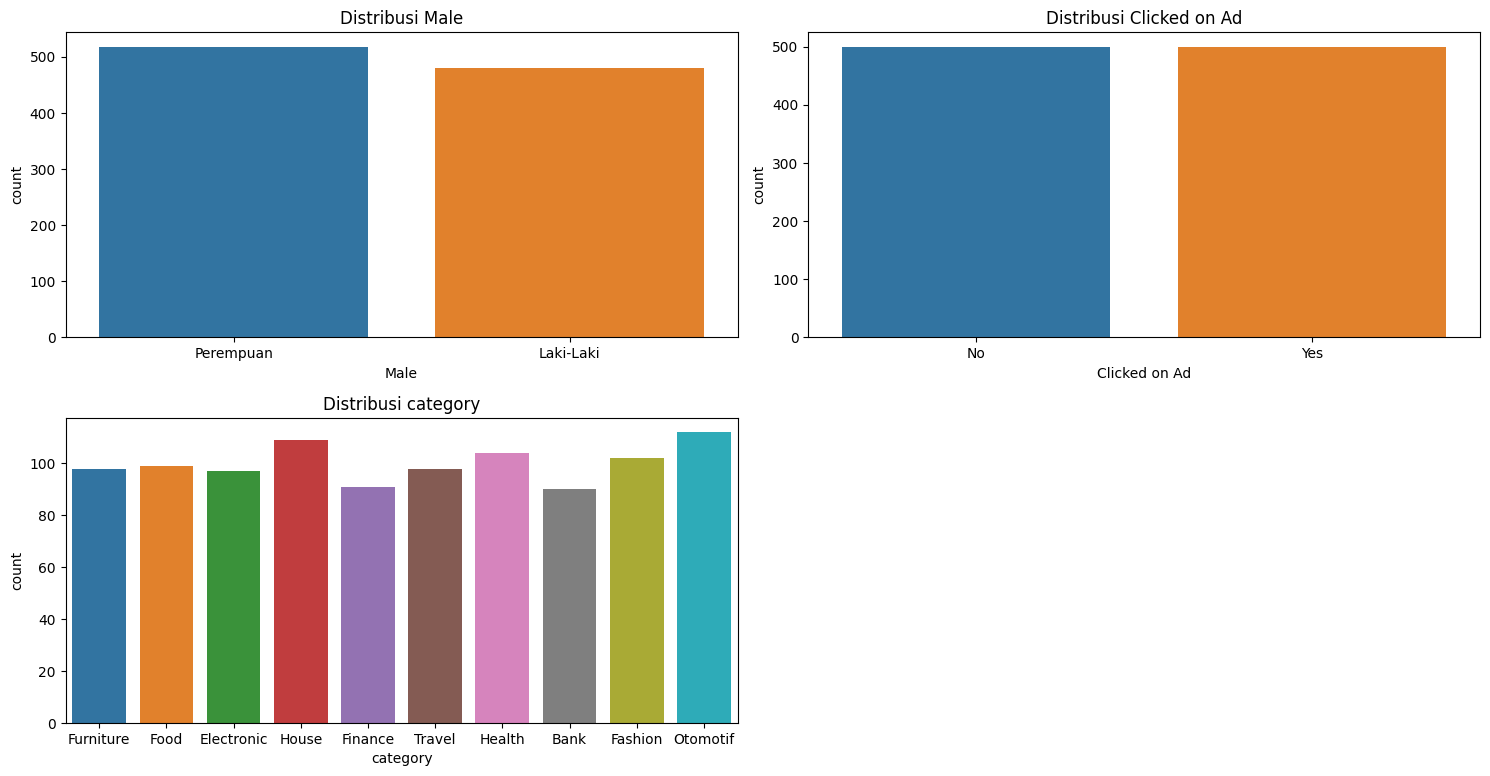

In [ ]:
# Create histplot for categorical columns
dist_cat = ['Male','Clicked on Ad','category']

plt.figure(figsize=(15, 19))
for i in range(0, len(dist_cat)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=df[dist_cat[i]])
    plt.title(f'Distribusi {dist_cat[i]}')
    plt.tight_layout()

- Terdapat outlier di fitur Area Income
- Clicked on Ad (fitur target) seimbang

## Bivariate Analysis

### Numerical Feature

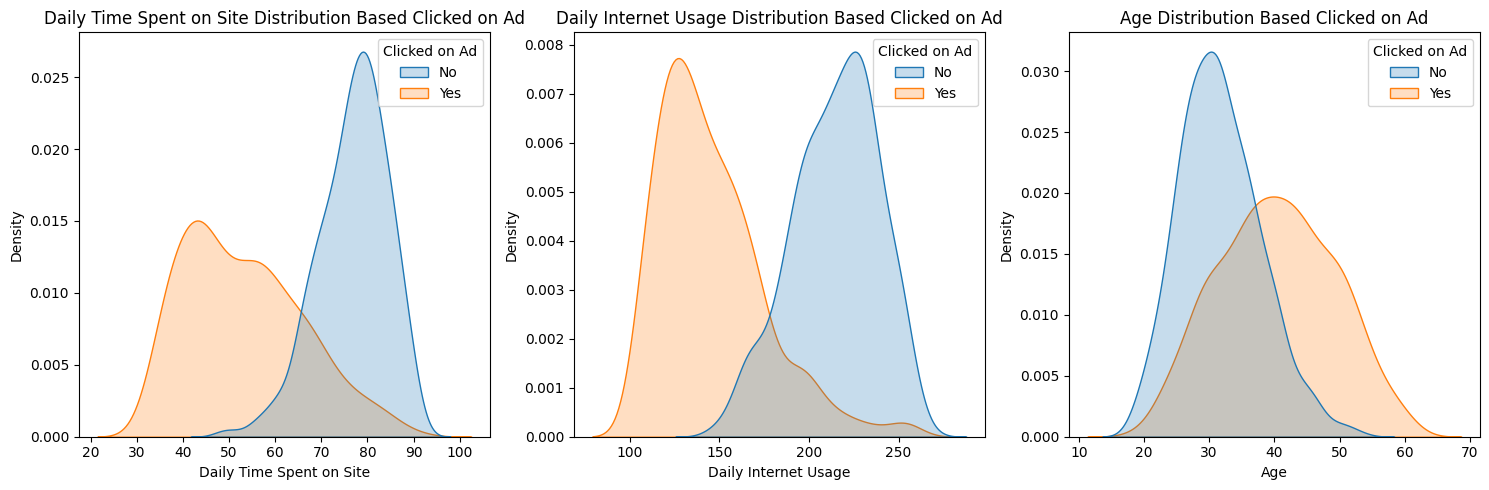

In [ ]:
feats = ['Daily Time Spent on Site', 'Daily Internet Usage', 'Age']

plt.figure(figsize=(15, 5))
for i in range(0, len(feats)):
    plt.subplot(1, 3, i+1)
    sns.kdeplot(df, x=df[feats[i]], hue=df['Clicked on Ad'], fill=True).set(title=f'{feats[i]} Distribution Based Clicked on Ad')
    plt.tight_layout()

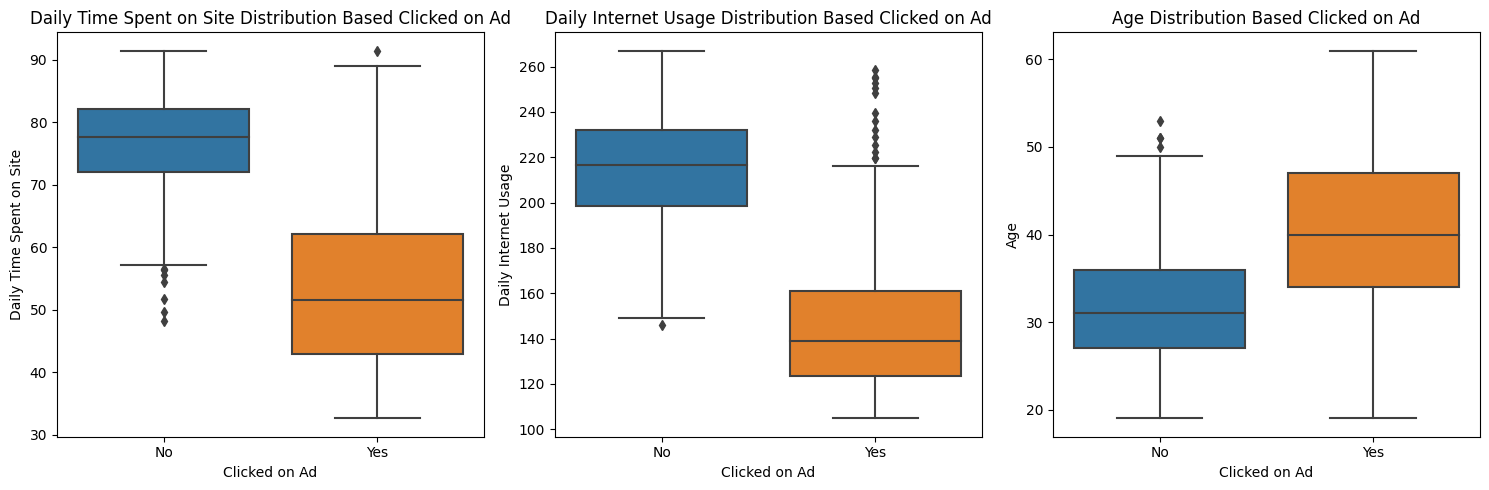

In [ ]:
# distribusi menggunakan boxplot
plt.figure(figsize=(15, 5))
for i in range(0, len(feats)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(df, y=df[feats[i]], x=df['Clicked on Ad'], orient='v').set(title=f'{feats[i]} Distribution Based Clicked on Ad')
    plt.tight_layout()

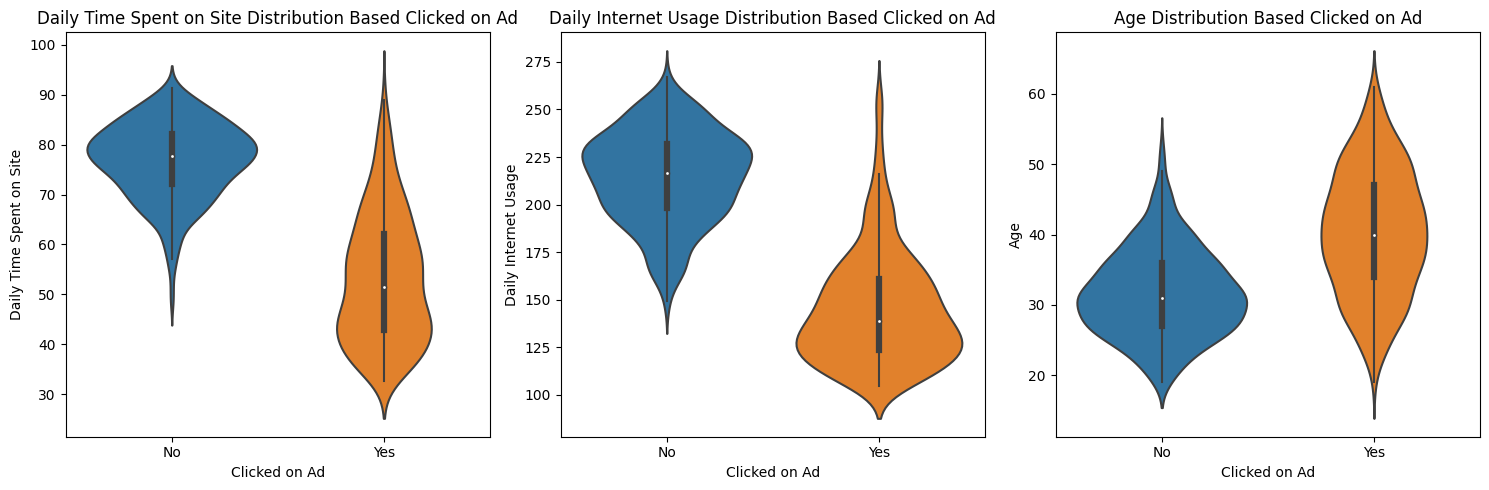

In [ ]:
# distribusi menggunakan violinplot
plt.figure(figsize=(15, 5))
for i in range(0, len(feats)):
    plt.subplot(1, 3, i+1)
    sns.violinplot(df, y=df[feats[i]], x=df['Clicked on Ad']).set(title=f'{feats[i]} Distribution Based Clicked on Ad')
    plt.tight_layout()

**Daily Time Spent**<br>
- User yang sedikit menghabiskan waktu di sebuah situs (kurang dari 1 jam) memiliki potensi untuk mengklik iklan yang lebih besar<br>

**Daily Internet Usage**<br>
- User dengan pemakaian internet yang rendah memiliki potensi untuk mengklik iklan yang lebih besar.

**Age**<br>
- User yang lebih tua memiliki potensi mengklik iklan yang lebih besar.

### Categorical Feature

#### **Gender**

In [ ]:
# Grouping Data
gc = df.groupby(['Male','Clicked on Ad']).agg({'Unnamed: 0':['count']}).reset_index()
gc.columns = ['Gender', 'Clicked on Ad', 'Total']
gc

,Gender,Clicked on Ad,Total
0,Laki-Laki,No,248
1,Laki-Laki,Yes,231
2,Perempuan,No,250
3,Perempuan,Yes,268


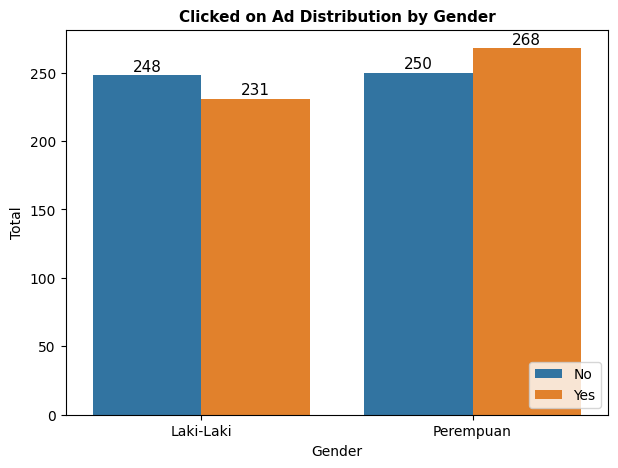

In [ ]:
# Membuat barplot
plt.figure(figsize=(7, 5))
ax = sns.barplot(x='Gender', y='Total', data=gc, estimator=sum, hue='Clicked on Ad')
ax.legend(loc='lower right')

# Menambahkan nilai di atas barplot
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 6), textcoords='offset points')

# Judul
ax.set_title('Clicked on Ad Distribution by Gender', color='black',
             fontsize=11, fontweight='bold')

plt.show()

Secara keseluruhan perbedaan gender pada potensi klik iklan tidak terlalu signifikan, namun lebih banyak perempuan yang mengklik ads.

#### **Category**

In [ ]:
# Grouping Data
cc = df.groupby(['category','Clicked on Ad']).agg({'Unnamed: 0':['count']}).reset_index()
cc.columns = ['Category', 'Clicked on Ad', 'Total']
cc.head()

,Category,Clicked on Ad,Total
0,Bank,No,51
1,Bank,Yes,39
2,Electronic,No,49
3,Electronic,Yes,48
4,Fashion,No,46


In [ ]:
category_order = cc.groupby('Category')['Total'].sum().sort_values(ascending=False).index
category_order

Index(['Otomotif', 'House', 'Health', 'Fashion', 'Food', 'Furniture', 'Travel',
       'Electronic', 'Finance', 'Bank'],
      dtype='object', name='Category')

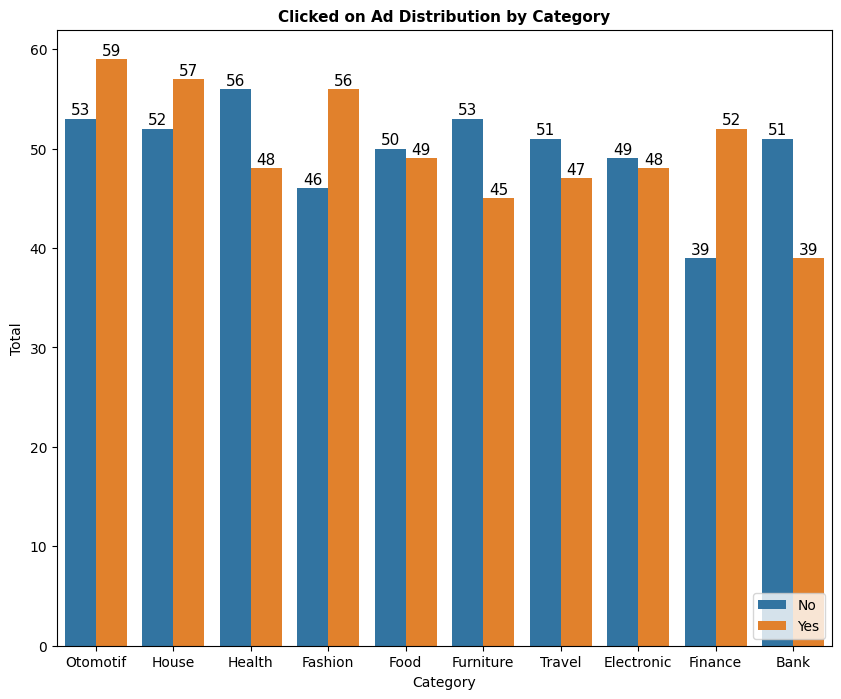

In [ ]:
# Membuat barplot
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Category', y='Total', data=cc, estimator=sum, hue='Clicked on Ad', order=category_order)
ax.legend(loc='lower right')

# Menambahkan nilai di atas barplot
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 6), textcoords='offset points')

# Judul
ax.set_title('Clicked on Ad Distribution by Category', color='black',
             fontsize=11, fontweight='bold')

plt.show()

Kategori dengan potensi klik tertinggi adalah Finance, Fashion, dan Otomotif.

#### **Session**

Menganalisis waktu potensial bagi user yang mengklik iklan penting karena dapat memberikan wawasan yang berharga tentang perilaku pengguna dan membantu perusahaan mengoptimalkan strategi pemasaran mereka.

In [ ]:
df1 = df.copy()

Melakukan extract Tahun, Bulan, Hari, dan Jam (Waktu) pada fitur Timestamp

In [ ]:
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])

df1['Year'] = df1['Timestamp'].dt.year
df1['Month'] = df1['Timestamp'].apply(lambda x: calendar.month_name[x.month])
df1['Day'] = df1['Timestamp'].dt.day_name()
df1['Time'] = df1['Timestamp'].dt.hour

In [ ]:
df1.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Year,Month,Day,Time
0,0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,2016,March,Sunday,0
1,1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,No,Denpasar,Bali,Food,2016,April,Monday,1
2,2,69.47,26,418501580.0,236.50,Perempuan,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic,2016,March,Sunday,20
3,3,74.15,29,383643260.0,245.89,Laki-Laki,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House,2016,January,Sunday,2
4,4,68.37,35,517229930.0,225.58,Perempuan,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance,2016,June,Friday,3


In [ ]:
# Grouping Data
viz = df1.groupby(['Day','Clicked on Ad']).agg({'Unnamed: 0':'count'}).reset_index()
viz.columns = ['Day', 'Clicked on Ad', 'Total Clicked']
viz

# Mengurutkan berdasarkan hari
sort_day = ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
viz['Day'] = pd.Categorical(viz['Day'], categories=sort_day, ordered=True)
viz = viz.sort_values(by=['Day'])

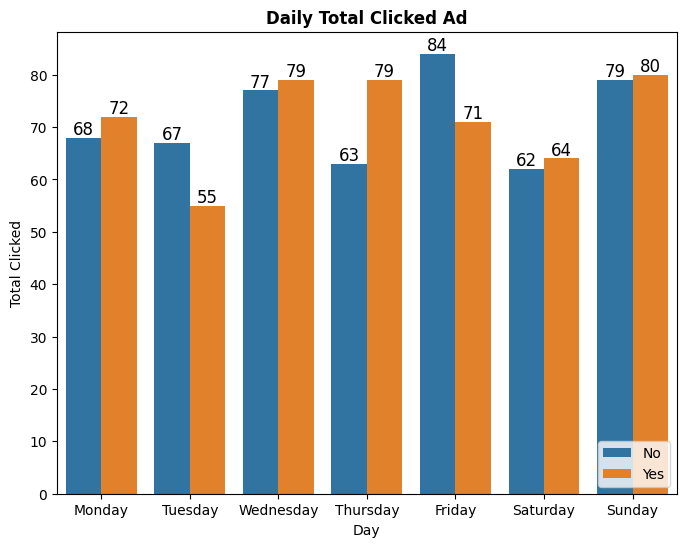

In [ ]:
# Membuat barplot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Day', y='Total Clicked', data=viz, estimator=sum, hue='Clicked on Ad')
ax.legend(loc='lower right')

# Menambahkan nilai di atas barplot
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 6), textcoords='offset points')

# Judul
ax.set_title('Daily Total Clicked Ad', color='black',
             fontsize=12, fontweight='bold')

plt.show()

- Banyak user yang mengklik iklan di hari Rabu, Kamis, dan Minggu.
- Hari Kamis memiliki konversi klik iklan yang paling baik, jumlah user yang mengklik tinggi dan yang tidak mengklik rendah

In [ ]:
# Grouping Data
viz2 = df1.groupby(['Time', 'Clicked on Ad']).agg({'Unnamed: 0':'count'}).reset_index()
viz2.columns = ['Time', 'Clicked on Ad', 'Total Clicked']
viz2 = viz2.sort_values(by=['Time'])

Text(0.5, 1.0, 'Hourly Total Clicked Ad')

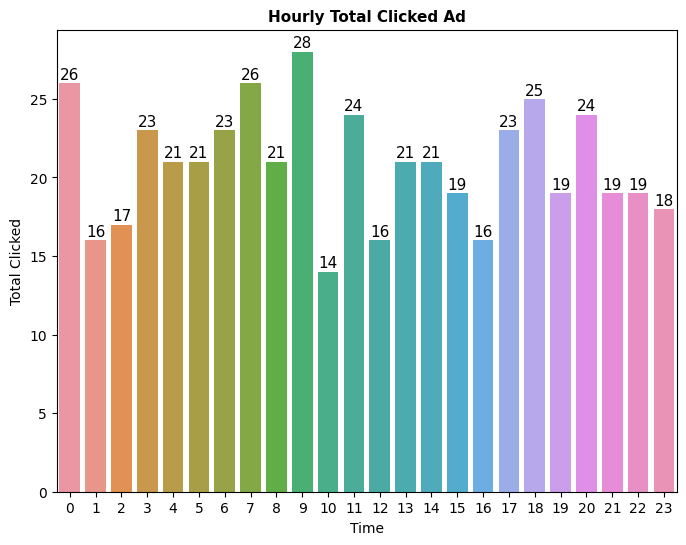

In [ ]:
# Membuat barplot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Time', y='Total Clicked', data=viz2[viz2['Clicked on Ad'] == 'Yes'])

# Menambahkan nilai di atas barplot
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 6), textcoords='offset points')

# Judul
ax.set_title('Hourly Total Clicked Ad', color='black',
             fontsize=11, fontweight='bold')

- Potensi user untuk mengklik iklan lebih tinggi pada pukul 00.00, 09.00, dan 18.00.
- Ini mungkin karena kebiasaan pengguna saat menggunakan perangkat digital.
- Pada pukul 00.00, orang mungkin tidak punya banyak tugas yang mendesak, jadi mereka lebih mungkin menghabiskan waktu online.
- Pukul 09.00 mungkin menjadi waktu jeda di antara pekerjaan atau istirahat singkat.
- Pukul 18.00 adalah waktu setelah bekerja di mana mereka bisa fokus pada kegiatan pribadi.

### Multivariate Analysis

#### **Heatmap**

In [ ]:
feat = ['Daily Time Spent on Site', 'Daily Internet Usage', 'Age']
target = 'Clicked on Ad'

df2 = df[num].copy()
df2['Clicked on Ad'] = df['Clicked on Ad'].map({'Yes':1, 'No':0})
df2.drop('Clicked on Ad', axis= 1, inplace = True)
df2

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
0,0,68.95,35,432837300.0,256.09
1,1,80.23,31,479092950.0,193.77
2,2,69.47,26,418501580.0,236.50
3,3,74.15,29,383643260.0,245.89
4,4,68.37,35,517229930.0,225.58
...,...,...,...,...,...
995,995,72.97,30,499691990.0,208.58
996,996,51.30,45,474475190.0,134.42
997,997,NaN,51,296910040.0,120.37
998,998,55.55,19,293445530.0,187.95


Text(0.5, 1.0, 'Heatmap Correlation')

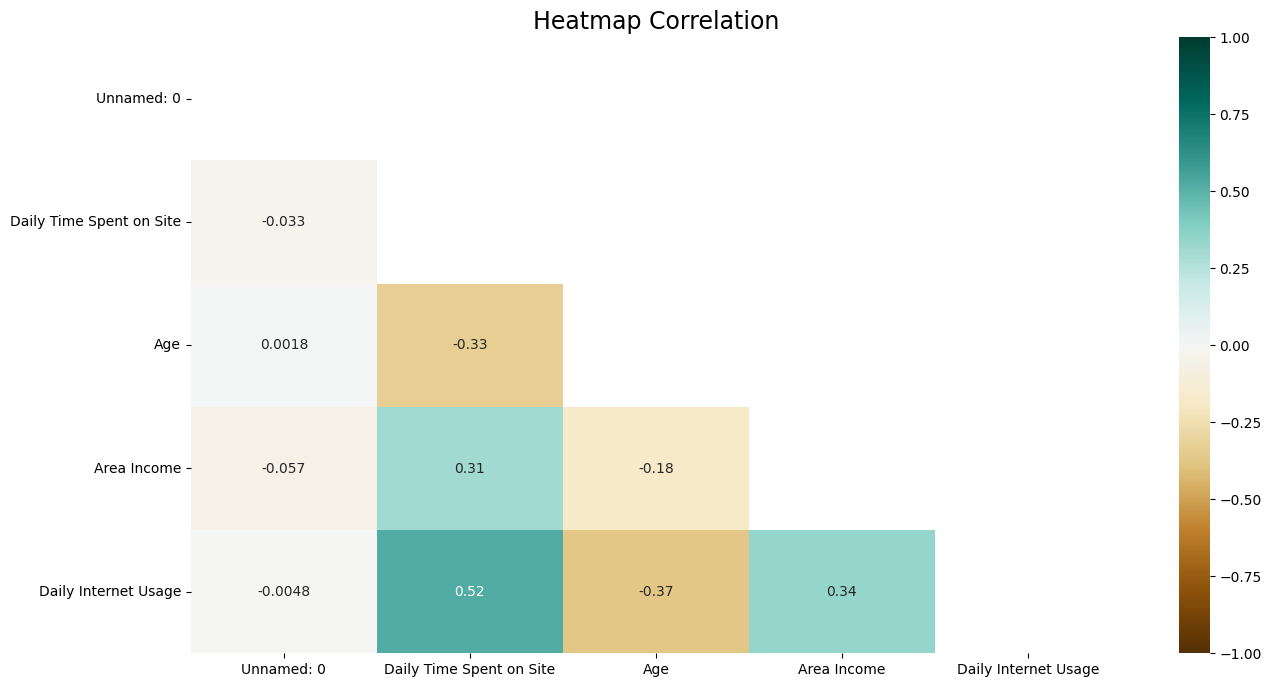

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(15,8))

# plot the heatmap
mask = np.triu(np.ones_like(df2.corr(), dtype=np.bool))
sns.heatmap(df2.corr(), mask=mask, cmap='BrBG', vmin=-1, vmax=1, annot=True)
plt.title('Heatmap Correlation', fontsize=17)

- Tidak ada fitur yang redundan.
- Korelasi tertinggi adalah antara Daily Time Spent on Site dengan Daily Internet Usage, dimana semakin lama user menghabiskan waktu di site maka semakin tinggi pemakaian internet hariannya.
- Semakin besar income user juga semakin besar pemakaian internet hariannya.

# Data Pre-Processing

## Handle Missing Values

In [ ]:
df_clean = df1.copy()

In [ ]:
df_clean.isna().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
Year                         0
Month                        0
Day                          0
Time                         0
dtype: int64

In [ ]:
# Mengisi Daily Time Spent on Site, Area Income, Daily Internet Usage dengan median
df_clean.fillna(df_clean.median(), inplace=True)

In [ ]:
# Mengisi Male dengan modus
df_clean['Male'].fillna(df_clean['Male'].mode()[0], inplace = True)

In [ ]:
# Check
df_clean.isna().sum()

Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
Year                        0
Month                       0
Day                         0
Time                        0
dtype: int64

## Feature Encoding

- Label Encoding: Male, Clicked on Ad
- One Hot Encoding: Category

In [ ]:
#Encode Feature From Categorical to Numerical
df_clean['Clicked on Ad'] = df_clean['Clicked on Ad'].map({'Yes':1, 'No':0})
df_clean['Male'] = df_clean['Male'].map({'Laki-Laki':1, 'Perempuan':0})
df_clean.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Year,Month,Day,Time
0,0,68.95,35,432837300.0,256.09,0,2016-03-27 00:53:00,0,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,2016,March,Sunday,0
1,1,80.23,31,479092950.0,193.77,1,2016-04-04 01:39:00,0,Denpasar,Bali,Food,2016,April,Monday,1
2,2,69.47,26,418501580.0,236.50,0,2016-03-13 20:35:00,0,Surabaya,Jawa Timur,Electronic,2016,March,Sunday,20
3,3,74.15,29,383643260.0,245.89,1,2016-01-10 02:31:00,0,Batam,Kepulauan Riau,House,2016,January,Sunday,2
4,4,68.37,35,517229930.0,225.58,0,2016-06-03 03:36:00,0,Medan,Sumatra Utara,Finance,2016,June,Friday,3


In [ ]:
# One Hot Encoding for category
df_clean = pd.get_dummies(df_clean, columns=['category'])
df_clean.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,...,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
0,0,68.95,35,432837300.0,256.09,0,2016-03-27 00:53:00,0,Jakarta Timur,Daerah Khusus Ibukota Jakarta,...,0,0,0,0,0,1,0,0,0,0
1,1,80.23,31,479092950.0,193.77,1,2016-04-04 01:39:00,0,Denpasar,Bali,...,0,0,0,0,1,0,0,0,0,0
2,2,69.47,26,418501580.0,236.50,0,2016-03-13 20:35:00,0,Surabaya,Jawa Timur,...,0,1,0,0,0,0,0,0,0,0
3,3,74.15,29,383643260.0,245.89,1,2016-01-10 02:31:00,0,Batam,Kepulauan Riau,...,0,0,0,0,0,0,0,1,0,0
4,4,68.37,35,517229930.0,225.58,0,2016-06-03 03:36:00,0,Medan,Sumatra Utara,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                1000 non-null   int64         
 1   Daily Time Spent on Site  1000 non-null   float64       
 2   Age                       1000 non-null   int64         
 3   Area Income               1000 non-null   float64       
 4   Daily Internet Usage      1000 non-null   float64       
 5   Male                      1000 non-null   int64         
 6   Timestamp                 1000 non-null   datetime64[ns]
 7   Clicked on Ad             1000 non-null   int64         
 8   city                      1000 non-null   object        
 9   province                  1000 non-null   object        
 10  Year                      1000 non-null   int64         
 11  Month                     1000 non-null   object        
 12  Day                  

## Feature Selection

Menghapus fitur yang tidak digunakan dalam model.

In [ ]:
df_clean.drop(columns= ['Unnamed: 0', 'city', 'province'], inplace = True)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Male                      1000 non-null   int64         
 5   Timestamp                 1000 non-null   datetime64[ns]
 6   Clicked on Ad             1000 non-null   int64         
 7   Year                      1000 non-null   int64         
 8   Month                     1000 non-null   object        
 9   Day                       1000 non-null   object        
 10  Time                      1000 non-null   int64         
 11  category_Bank             1000 non-null   uint8         
 12  category_Electronic  

# Data Modeling

## Split Data Train and Data Test

Split data train dan test dilakukan dengan perbandingan 70:30

In [ ]:
df_model = df_clean.copy()

In [ ]:
df_model['Month'] = df_model['Timestamp'].dt.month
df_model['Day'] = df_model['Timestamp'].dt.dayofweek
df_model = df_model.drop(['Timestamp'], axis=1)

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Clicked on Ad             1000 non-null   int64  
 6   Year                      1000 non-null   int64  
 7   Month                     1000 non-null   int64  
 8   Day                       1000 non-null   int64  
 9   Time                      1000 non-null   int64  
 10  category_Bank             1000 non-null   uint8  
 11  category_Electronic       1000 non-null   uint8  
 12  category_Fashion          1000 non-null   uint8  
 13  category_Finance          1000 non-null   uint8  
 14  category_

In [ ]:
# define X (fitur) and y (target)
x = df_model.drop(columns='Clicked on Ad')
y = df_model['Clicked on Ad']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
print('Split 70:30')
print('Total rows & column of train set:',x_train.shape)
print('Total rows & column of test set:',x_test.shape)

Split 70:30
Total rows & column of train set: (700, 19)
Total rows & column of test set: (300, 19)


In [ ]:
y_train.value_counts()

0    354
1    346
Name: Clicked on Ad, dtype: int64

## Model Evaluation Function

In [ ]:
from datetime import datetime as dt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

def experiment(x_train, x_test, y_train, y_test):
    models = [
        ('Decision Tree', DecisionTreeClassifier(random_state=1)),
        ('Random Forest', RandomForestClassifier(random_state=1)),
        ('Logistic Regression', LogisticRegression(random_state=1)),
        ('XGBoost', XGBClassifier(random_state=1)),
        ('KNN', KNeighborsClassifier()),
        ('SVC', SVC(random_state=1))
    ]

    result = []
    for name, model in models:
        start = dt.now()
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        duration = (dt.now()-start).total_seconds()

        # evaluasi
        accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
        precision = round(precision_score(y_test, y_pred)* 100, 2)
        recall = round(recall_score(y_test, y_pred)* 100, 2)
        f1 = round(f1_score(y_test, y_pred)* 100, 2)
        result.append((name, accuracy, precision, recall, f1, duration))

    df_result = pd.DataFrame(result, columns=['Model', 'Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1 (%)', 'Duration'])
    return df_result

## Experiment 1 - Machine Learning Without Standarization

In [ ]:
exp1 = experiment(x_train, x_test, y_train, y_test)
exp1.sort_values(by='Accuracy (%)', ascending=False)

,Model,Accuracy (%),Precision (%),Recall (%),F1 (%),Duration
1,Random Forest,95.00,95.42,94.81,95.11,0.230947
3,XGBoost,94.67,96.00,93.51,94.74,0.166029
0,Decision Tree,92.67,92.86,92.86,92.86,0.013634
5,SVC,68.67,77.78,54.55,64.12,0.031365
4,KNN,68.00,71.01,63.64,67.12,0.075377
2,Logistic Regression,48.67,0.00,0.00,0.00,0.026808


- Hasil model tanpa standardisasi yang memiliki nilai akurasi tertinggi adalah Random Forest.
- Algoritma lain yang juga memiliki akurasi yang tinggi adalah XGBoost dan Decision Tree.

## Experiment 2 - Machine Learning with Standarization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [ ]:
exp2 = experiment(x_train_scaled, x_test_scaled, y_train, y_test)
exp2.sort_values(by='Accuracy (%)', ascending=False)

,Model,Accuracy (%),Precision (%),Recall (%),F1 (%),Duration
2,Logistic Regression,97.00,98.01,96.10,97.05,0.007365
5,SVC,95.67,98.62,92.86,95.65,0.013999
1,Random Forest,95.33,96.67,94.16,95.39,0.208338
3,XGBoost,95.33,97.30,93.51,95.36,0.088559
4,KNN,92.67,99.25,86.36,92.36,0.025160
0,Decision Tree,92.33,91.72,93.51,92.60,0.009775


- Hasil model menggunakan standarisasi yang memiliki nilai akurasi tertinggi adalah Logistic Regression.
- Pada algoritma SVC dan Logistic Regression hasil akurasi meningkat secara signifikan dengan menggunakan standarisasi fitur.

# Model Evaluation

- Dalam pemodelan ini, digunakan algoritma Logistic Regression karena memiliki nilai akurasi tertinggi, setelah dilakukan standarisasi fitur.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

final_model = LogisticRegression(random_state=1)
final_model.fit(x_train_scaled, y_train)
y_pred = final_model.predict(x_test_scaled)

def show_cmatrix(y_test, pred):
    # Creating confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Putting the matrix a dataframe form
    cm_df = pd.DataFrame(cm, index=['Not Clicked Ads', 'Clicked Ads'],
                 columns=['Predicted Not Clicked Ads', 'Predicted Clicked Ads'])

    # visualizing the confusion matrix
    sns.set(font_scale=1.2)
    plt.figure(figsize=(9,5))

    sns.heatmap(cm, annot=True, fmt='g', cmap="Blues",xticklabels=cm_df.columns, yticklabels=cm_df.index, annot_kws={"size": 12})
    plt.title("Confusion Matrix", size=15)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label');

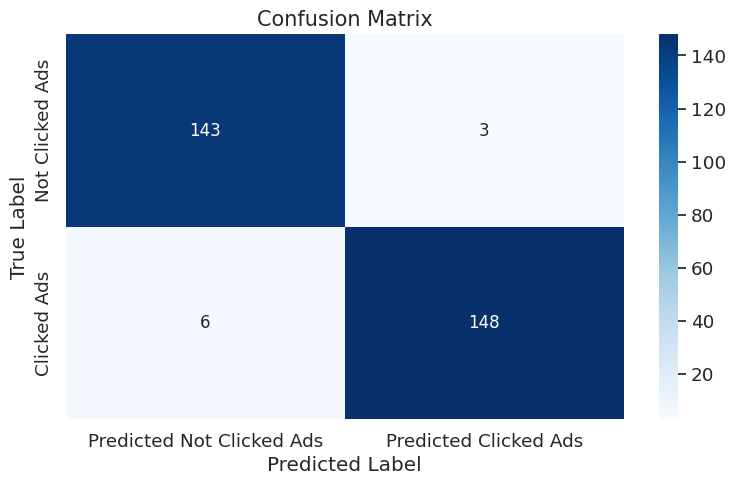

In [ ]:
show_cmatrix(y_test, y_pred)

Berdasarkan evaluasi algoritma Logistic Regression dari confussion matrix terlihat bahwa model sangat baik memprediksi user yang klik iklan atau tidak dengan nilai kesalahan prediksi yang kecil.
- Terdapat 143 prediksi benar yang diklasifikasikan user yang tidak mengklik iklan (True Negatives, TN).
- Terdapat 3 prediksi salah yang diklasifikasikan sebagai user yang mengklik iklan padahal sebenarnya bukan (False Positives, FP).
- Terdapat 6 prediksi salah yang diklasifikasikan sebagai user yang tidak mengklik iklan padahal sebenarnya adalah mengklik iklan (False Negatives, FN).
- Terdapat 148 prediksi benar yang diklasifikasikan sebagai user yang mengklik iklan (True Positives, TP).

# Feature Importance

In [ ]:
# Features Importances
def feature_importance(model):
    feat_importances = pd.Series(abs(final_model.coef_[0]), index=x_train.columns)
    ax = feat_importances.nlargest(20).plot(kind='barh', color='skyblue', figsize=(10, 7))
    ax.invert_yaxis()

    plt.xlabel('Coefficient Magnitude', fontsize=13)
    plt.ylabel('Feature', fontsize=13)
    plt.title('Feature Importance', fontsize=13)

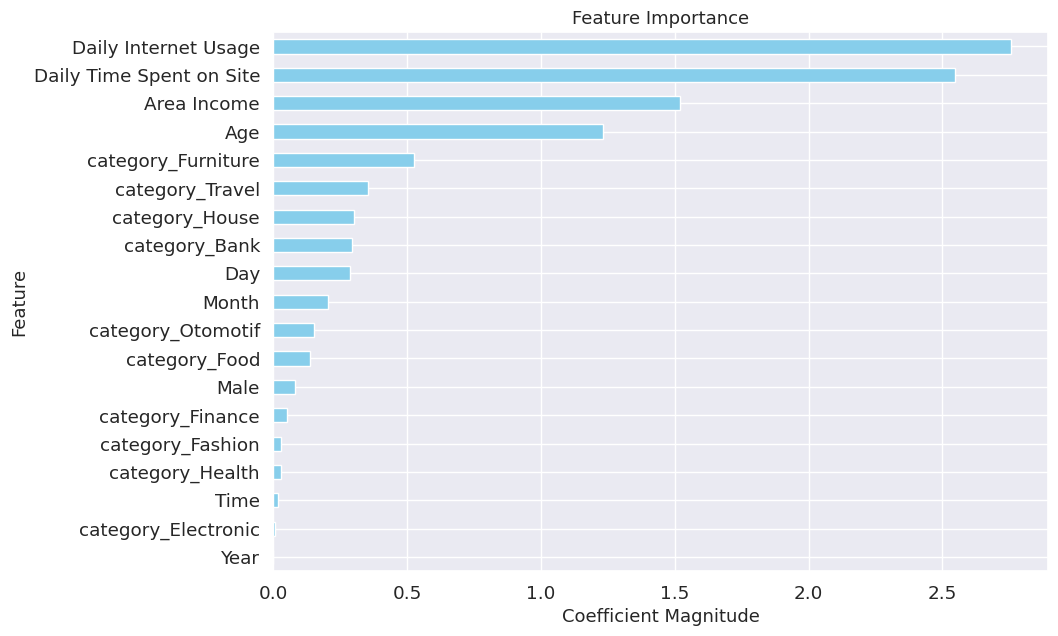

In [ ]:
feature_importance(final_model)

In [ ]:
# Mendapatkan koefisien dari model
coefficients = final_model.coef_[0]

# Menyusun koefisien bersama dengan nama fiturnya ke dalam DataFrame
fi_coef = pd.DataFrame({'Feature': x_train.columns, 'Coefficient': coefficients})

# Menampilkan DataFrame
print("Feature Importance:")
print(fi_coef)

Feature Importance:
                     Feature  Coefficient
0   Daily Time Spent on Site    -2.549064
1                        Age     1.232805
2                Area Income    -1.519020
3       Daily Internet Usage    -2.757743
4                       Male    -0.081505
5                       Year     0.000000
6                      Month     0.205665
7                        Day     0.287193
8                       Time    -0.016758
9              category_Bank     0.294677
10       category_Electronic    -0.004974
11          category_Fashion    -0.027839
12          category_Finance     0.049995
13             category_Food     0.138814
14        category_Furniture    -0.524954
15           category_Health    -0.027739
16            category_House     0.302552
17         category_Otomotif     0.150554
18           category_Travel    -0.352747


- Dari plot feature importance, dapat disimpulkan bahwa Daily Internet Usage, Daily Time Spent on Site, Area Income, dan Age adalah fitur yang paling berpengaruh dalam memprediksi klik iklan.
- Fitur-fitur tersebut memiliki koefisien magnitudo yang paling besar, dan berkorelasi negatif untuk Daily Internet Usage, Daily Time Spent on Site, dan Area Income, menunjukkan bahwa user yang tidak aktif online dan memiliki pendapatan menengah ke bawah cenderung lebih mungkin mengklik iklan.
- Sebaliknya, fitur Age memiliki korelasi positif, menandakan bahwa semakin tua usia user, semakin tinggi potensi untuk mengklik iklan.

# Business Simulation

## Conversion Rate

TP = 148 <br>
FP = 3 <br>
TP + FP = 148 + 3 = 151 user sebagai sample

In [ ]:
df_simulation = df_model.sample(151,random_state=24)
clicked_ads = df_simulation[df_simulation['Clicked on Ad']==1]['Clicked on Ad'].count()
unclicked_ads = df_simulation[df_simulation['Clicked on Ad']==0]['Clicked on Ad'].count()

ctr = round(clicked_ads / (len(df_simulation))*100,2)

print("Total Unclicked_ads : ",unclicked_ads)
print("Total Clicked ads : ",clicked_ads)
print("Clicked True Rate (Before Modelling) : ",ctr,"%")

Total Unclicked_ads :  77
Total Clicked ads :  74
Clicked True Rate (Before Modelling) :  49.01 %


In [ ]:
unclicked_ads_model = 3
clicked_ads_model = 148
ctr = round(clicked_ads_model / (len(df_simulation))*100,2)

print("Total Unclicked_ads : ",unclicked_ads_model)
print("Total Clicked ads : ",clicked_ads_model)
print("Clicked True Rate (With Model) : ",ctr,"%")

Total Unclicked_ads :  3
Total Clicked ads :  148
Clicked True Rate (With Model) :  98.01 %


Tingkat Konversi dengan model 49% lebih tinggi dibandingkan tingkat konversi tanpa model. Dengan demikian, model mempunyai pengaruh yang besar terhadap tingkat konversi dan Pendapatan bagi perusahaan.

## Revenue Calculation

**Asumsi:**

harga rata-rata Google Ads per pengguna & per klik : 1$

Pendapatan dari setiap iklan yang diklik : 3$

In [ ]:
cost = 1
Total_cost = round(cost * len(df_simulation),2)
print("Total Cost : ",Total_cost,"$")

Total Cost :  151 $


In [ ]:
#Revenue & Profit before modeling
revenue = 3
Total_revenue = revenue * clicked_ads
Profit = round(Total_revenue - Total_cost,2)
print("Total Revenue (Before Modeling) : ",Total_revenue,"$")
print("Profit (Before Modeling) : ",Profit,"$")

Total Revenue (Before Modeling) :  222 $
Profit (Before Modeling) :  71 $


In [ ]:
#Revenue & Profit after modeling
revenue = 3
Total_revenue = revenue * clicked_ads_model
Profit = round(Total_revenue - Total_cost,2)
print("Total Revenue (After Modeling) : ",Total_revenue,"$")
print("Profit (After Modeling) : ",Profit,"$")

Total Revenue (After Modeling) :  444 $
Profit (After Modeling) :  293 $


Dengan model, keuntungan meningkat dari 71 dolar menjadi 293 dolar

# Business Recommendation

Rekomendasi berdasarkan Feature Importance dan insight, adalah:

**1. Target Pengguna Non-Aktif:**
- Buat iklan singkat dan menarik untuk menangkap perhatian pengguna yang jarang menghabiskan waktu di situs (kurang dari 1 jam) dan jarang menggunakan internet, karena pengguna ini cenderung lebih mungkin mengklik iklan.
- Manfaatkan retargeting dengan menampilkan iklan yang relevan berulang kali untuk meningkatkan awareness.

**2. Relevansi Konten Iklan:**
- Pastikan konten iklan sesuai dengan minat dan kebutuhan pengguna non-aktif.

**3. Penawaran Harga Terjangkau:**
- Berikan penawaran harga yang terjangkau, diskon, atau promo untuk menarik pengguna dengan area income rendah.

**4. Optimalisasi Waktu dan Hari:**
- Manfaatkan hari Rabu, Kamis, dan Minggu untuk penayangan iklan karena memiliki konversi klik iklan yang baik.
- Pilih jam-jam pukul 00.00, 09.00, dan 18.00 yang menunjukkan potensi tinggi pengguna mengklik iklan dan melakukan pembelian.